In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from datetime import timedelta
import math
import random
import timeit

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.kernel_ridge import KernelRidge
from sklearn.gaussian_process.kernels import RBF
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Linear Regression (Jan, Tim)

### 1. Import data and visualize what we have so far

In [3]:
marburg = pd.read_pickle("../0_data/marburg_clean.pkl")
duisburg = pd.read_pickle('../0_data/duisburg_clean.pkl')
marburg_weather = pd.read_pickle("../0_data/weather/marburg_weather.pkl")
duisburg_weather = pd.read_pickle("../0_data/weather/duisburg_weather.pkl")

In [19]:
marburg_weather["h"]= marburg_weather.index
marburg["h"]=marburg.index.floor(freq='h')
marburgWeather = pd.merge(marburg, marburg_weather, how='left', left_on='h', right_on='h')
#marburgWeatherSorted = marburgWeather.sort_values(["h"])
#marburgWeatherSorted.head(20)

,day,time,b_number,city,orig,dest,weekday,hour,trip_duration_mins,h,temperature,precipitation
136362,2019-01-20,00:38:00,11261,marburg,"(50.8047, 8.7592)","(50.7952, 8.7633)",6,0,27,2019-01-20 00:00:00,-7.9,0.0
23960,2019-01-20,00:25:00,11113,marburg,"(50.8071, 8.7699)","(50.8047, 8.7592)",6,0,29,2019-01-20 00:00:00,-7.9,0.0
35289,2019-01-20,00:36:00,11126,marburg,"(50.8132, 8.7759)","(50.8132, 8.7633)",6,0,5,2019-01-20 00:00:00,-7.9,0.0
15862,2019-01-20,00:08:00,11103,marburg,"(50.7988, 8.7621)","(50.8045, 8.7704)",6,0,9,2019-01-20 00:00:00,-7.9,0.0
78264,2019-01-20,00:04:00,11181,marburg,"(50.7973, 8.7616)","(50.8081, 8.7753)",6,0,11,2019-01-20 00:00:00,-7.9,0.0
35288,2019-01-20,00:08:00,11126,marburg,"(50.7988, 8.7621)","(50.8132, 8.7759)",6,0,18,2019-01-20 00:00:00,-7.9,0.0
43013,2019-01-20,00:52:00,11136,marburg,"(50.8089, 8.7731)","(50.7988, 8.7621)",6,0,10,2019-01-20 00:00:00,-7.9,0.0
68503,2019-01-20,01:55:00,11169,marburg,"(50.7952, 8.7633)","(50.8045, 8.7704)",6,1,11,2019-01-20 01:00:00,-8.3,0.0
22232,2019-01-20,01:33:00,11111,marburg,"(50.8132, 8.7759)","(50.82, 8.7737)",6,1,9,2019-01-20 01:00:00,-8.3,0.0
14279,2019-01-20,01:59:00,11101,marburg,"(50.8188, 8.7738)","(50.8279, 8.7751)",6,1,10,2019-01-20 01:00:00,-8.3,0.0


*cool graph here*

### 2. Define independent and dependent variables

In [49]:
ym = marburgWeather.resample('H', on="h").count()["day"].values
# day of year
xm = marburgWeather.resample('H', on="h").max()['temperature'].values.reshape(-1,1)
xm = np.nan_to_num(xm, nan = 10.511236338797794)
# xp = Average temperature? High Temperature?
# yp = one of the KPIs? vielleicht Fleet Distance Traveled?

In [45]:
#xm_sum = np.sum(xm_no_nan)
#xm_nullcheck = np.isnan(xm_sum)
#xm_nullcheck

False

### 3. eigentlich: Train / Test split

In [64]:
xm_train, xm_test, ym_train, ym_test = train_test_split(xm, ym, test_size=0.2, random_state=0)

### 3. Initialize linear model with scikit-learn

In [65]:
linear_model_mar = LinearRegression()

### 4. Fit the model

In [66]:
linear_model_mar.fit(xm_train,ym_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### 5. Predict training data

In [67]:
y_pred_m = linear_model_mar.predict(xm_test)

### 6. Define y true

In [68]:
y_true_m = ym_test

### 7. Plot the linear model

C:\Users\Tim\anaconda3\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  import sys


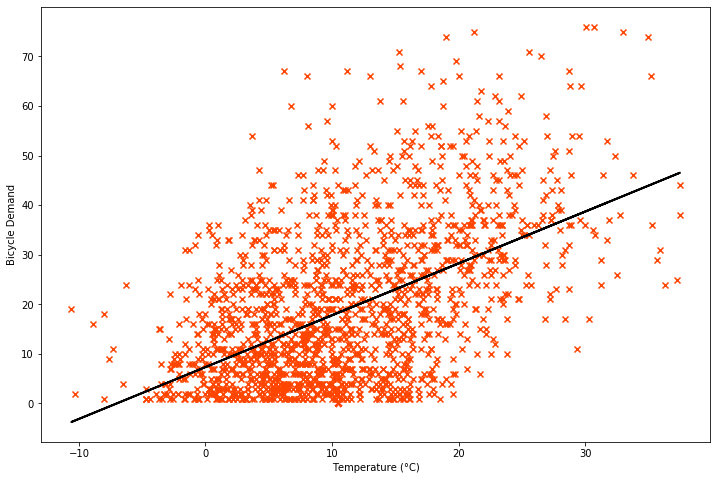

In [73]:
plt.figure(figsize = (12,8))

plt.scatter(xm_test, ym_test, marker="x", color = 'orangered')
plt.xlabel("Temperature (°C)")
plt.ylabel("Bicycle Demand")

plt.plot(xm_test, y_pred_m, c='C2', color = 'black', linewidth = 2, label='hier kommt noch ein label hin')

xlim, ylim =(plt.gca().get_xlim(), plt.gca().get_ylim())
plt.xlim(xlim)
plt.ylim(ylim)
#plt.legend()
plt.show()

### 8. Present test metrics

In [75]:
#print("Mean Absolute Error:",mean_absolute_error(y_pred_m, y_true_m),"Einheit (glaube KM dann)")
#print("Root Mean Squared Error:",mean_squared_error(y_pred_m, y_true_m)**0.5,"Einheit")
#print("Coefficient of determination:",r2_score(y_pred_m, y_true_m))

print("Mean Absolute Error:",mean_absolute_error(y_true_m, y_pred_m),"Einheit (glaube KM dann)")
print("Root Mean Squared Error:",mean_squared_error(y_true_m, y_pred_m)**0.5,"Einheit")
print("Coefficient of determination:",r2_score(y_true_m, y_pred_m))

Mean Absolute Error: 10.81111649215055 Einheit (glaube KM dann)
Root Mean Squared Error: 13.622387446003072 Einheit
Coefficient of determination: 0.25051982715386956


## Multiple linear regression

Adding another feature to the model, for example if its a weekday or not (funktioniert genau wie in WS 08).
To do that:

1. Add feature to dataframe (if it doesn't already exist)
2. Plot the same scatter plot as before, but with a different hue for the new feature
3. Train a new linear model with the additional feature, by passing a larger feature vector.
4. Predict weekdays and weekends seperately.
5. Plot the results.
6. Evaluate performance with different error metrics. Did the one-dimensional or two-dimensional model perform better?